# Import Libraries and Load Data Set

In [81]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Students Prediction Dataset (UCI)

In [102]:
import pandas as pd

url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
df = pd.read_csv(url, sep=';')
print(df)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

# Rregression Data Pipeline (SPM)

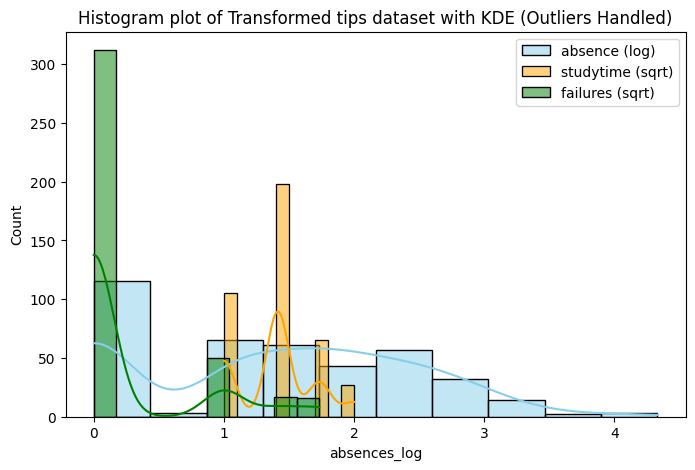

In [108]:
# Pipe line of students prediction data set
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def transformed_selective_data(df):
    
    # Apply Transformations
    df['absences_log'] = np.log1p(df['absences'])
    df['studytime_sqrt'] = np.sqrt(df['studytime'])
    df['failures_sqrt'] = np.sqrt(df['failures'])
    # Normal columns clean from outliers
    transformed_df = df[['G1', 'G2', 'G3', 'absences_log', 'studytime_sqrt', 'failures_sqrt']]
    return transformed_df 

transformed_df = transformed_selective_data(df)


plt.figure(figsize=(8,5))
sns.histplot(transformed_df['absences_log'], kde=True, color='skyblue', label='absence (log)', alpha=0.5)
sns.histplot(transformed_df['studytime_sqrt'], kde=True, color='orange', label='studytime (sqrt)', alpha=0.5)
sns.histplot(transformed_df['failures_sqrt'], kde=True, color='green', label='failures (sqrt)', alpha=0.5)

plt.legend()
plt.title('Histogram plot of Transformed tips dataset with KDE (Outliers Handled)')
plt.show()

# Student Masks Prediction Model 

In [107]:
#import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Call the Transformed data set
transformed_df = transformed_selective_data(df)
# Provides Features and Label veriable
X = transformed_df[['G1', 'G2', 'absences_log', 'studytime_sqrt', 'failures_sqrt']]
y = transformed_df['G3']
# Train the Model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)
# Call the Model/Algorithm
model=LinearRegression()
# Fit the model
model.fit(X_train, y_train)
# Predict the Train model
X_np = X.values 
model.fit(X_np, y)
new_data = np.array([[5,6,6,3,2]])
model.predict(new_data)
# y_pred = model.predict(X_test)
# print("R² Score:", r2_score(y_test, y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

array([5.8443248])